# Examples \& Exercises
The below example reads and visualizes the water level at New London (https://tidesandcurrents.noaa.gov/waterlevels.html?id=8461490) over a one-month period, you may try the toy example by running the following scripts. Assignments will be the  <font color="orange">Exercises</font>. You can utilize the code from the examples or create your own. 
<!-- Undergrad students are *not* required to complete the "Exercise for grad students". -->

In [1]:
## make sure you uncomment this cell before running the rest of the notebook in Google Colab
# %%capture

# # Install necessary packages and restart the kernel.
# !pip install pandas
# !pip install scipy
# !pip install numpy
# !pip install matplotlib

In [2]:
# import python libraries
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
from scipy import stats
from matplotlib import cm
import matplotlib.pyplot as plt

## 1. tidally modulated sea level variation

In [3]:
# load one month of sea level data from New London tidal guage (https://tidesandcurrents.noaa.gov/stationhome.html?id=8461490) 
df = pd.read_csv('../data/lecture02/NewLondon_sl_20250801-0830_6min.csv')
df

,Date,Time (GMT),Predicted (ft),Preliminary (ft),Verified (ft)
0,2025/08/01,00:00,1.297,2.07,-
1,2025/08/01,00:06,1.254,2.01,-
2,2025/08/01,00:12,1.212,1.95,-
3,2025/08/01,00:18,1.170,1.83,-
4,2025/08/01,00:24,1.129,1.76,-
...,...,...,...,...,...
7195,2025/08/30,23:30,1.554,2.17,-
7196,2025/08/30,23:36,1.515,2.13,-
7197,2025/08/30,23:42,1.475,2.10,-
7198,2025/08/30,23:48,1.436,2.07,-


In [4]:
# convert date and time to datetime
time = pd.to_datetime(df["Date"]+'T'+df["Time (GMT)"])
# convert sea level data to meters
sea_level_p = df["Predicted (ft)"].values*0.3048
sea_level = df["Preliminary (ft)"].values*0.3048

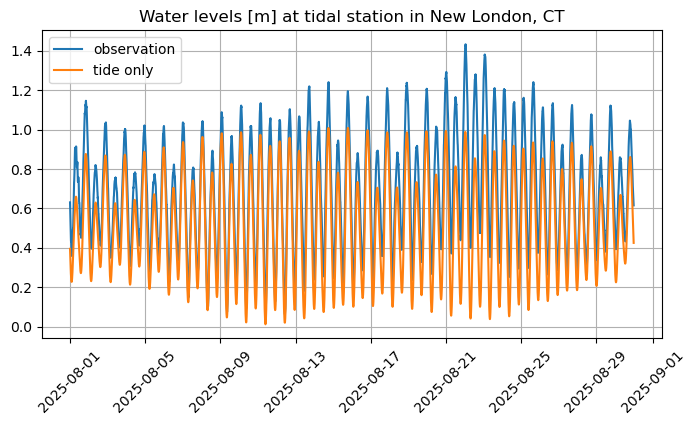

In [5]:
# plot sea level over the entire one-month period
# %matplotlib widget 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4))
ax.plot(time, sea_level, label="observation")
ax.plot(time, sea_level_p, label="tide only")
plt.xticks(rotation=45) # Rotates X-axis ticks by 45 degrees
plt.title("Water levels [m] at tidal station in New London, CT")
ax.grid(True) # add grids
ax.legend() # add legends

(np.float64(20301.0), np.float64(20305.0))

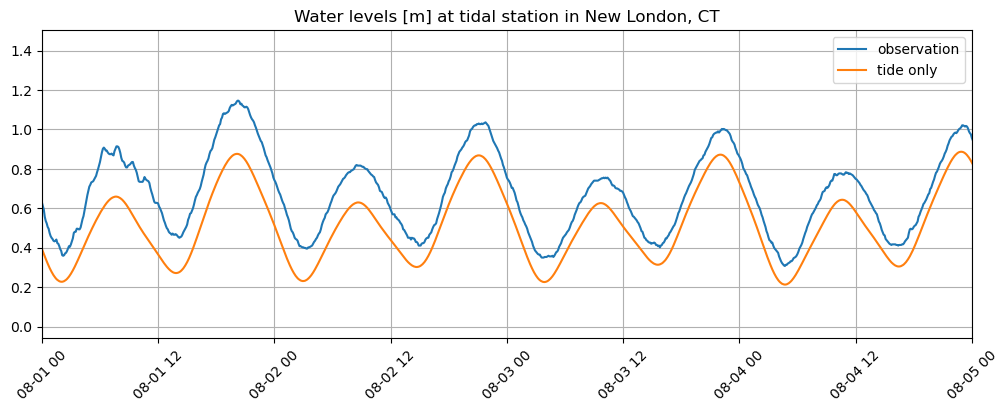

In [6]:
# plot sea level over the first 4 days
# %matplotlib widget 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,4))
ax.plot(time, sea_level, label="observation")
ax.plot(time, sea_level_p, label="tide only")
plt.xticks(rotation=45) # Rotates X-axis ticks by 45 degrees
plt.title("Water levels [m] at tidal station in New London, CT")
ax.grid(True) # add grids
ax.legend() # add legends
ax.set_xlim([pd.to_datetime('2025-08-01 00:00:00'), pd.to_datetime('2025-08-05 00:00:00')])

<div class="alert alert-block alert-warning">
<b>Exercise 1:</b> The figures above show tidal variations in water level at New London, CT. What is the dominant tidal period, and how can you identify it from the plots? Why are the two daily high water levels different (i.e., a higher high water and a lower high water)? (Tip: refer to tidal inequality — NOAA website: https://tidesandcurrents.noaa.gov/restles4.html) Describe the neap and spring tidal cycles visible in the data, and explain how they relate to the phases of the moon (tip: search for the moon cycle in August 2025).  Identify the tidal range during neap and spring tides, respectively. (1 pt) 
</div>

the mean high water level (MHWL) is 1.0452764307692308 meters


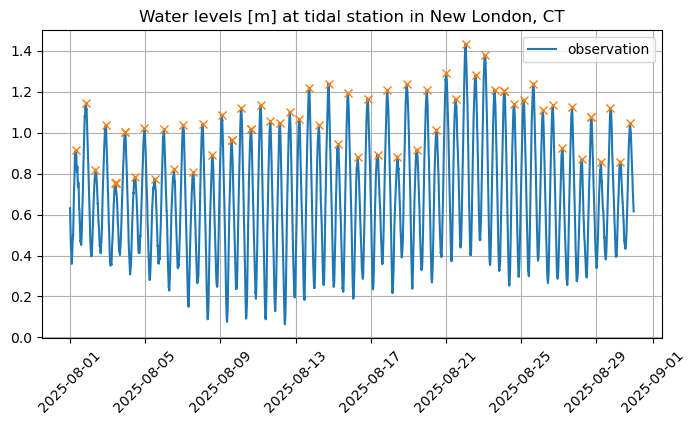

In [7]:
# plot sea level over the first two days
# %matplotlib widget 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4))
ax.plot(time, sea_level, label="observation")
# ax.plot(time, sea_level_p, label="tide only")
# find high tides (to select a typical hight tide over 12 hours tidal period, I search for width of at least 40 samples - 4 hours)
peaks, _ = find_peaks(sea_level, width=40)
plt.plot(time[peaks], sea_level[peaks], "x")
plt.xticks(rotation=45) # Rotates X-axis ticks by 45 degrees
plt.title("Water levels [m] at tidal station in New London, CT")
ax.grid(True) # add grids
ax.legend() # add legends
# calculate mean high water level
MHWL = np.mean(sea_level[peaks])
print(f"the mean high water level (MHWL) is {MHWL} meters")

<div class="alert alert-block alert-warning">
<b>Additional Exercise: </b> Can you use the find_peaks function to identify low water levels instead, make a plot that shows the identified low water levels, and calculate the mean low water level? (1 pt)
</div>

<div class="alert alert-block alert-warning">
<b>Exercise 2:</b> Can you create a plot of New London water levels during Hurricane Irene (1 pt) and explain the observed water level rise associated with the storm surge (1 pt)? (tip: read article "Tropical Storm Irene Delivered a Sunday Punch to Connecticut" https://digitalcommons.lib.uconn.edu/wracklines/68/)
</div>

In [8]:
# load water level data during hurricane Irine
df1 = pd.read_csv('../data/lecture02/NewLondon_sl_20110815-0914_6min.csv')
df1

,Date,Time (GMT),Predicted (ft),Preliminary (ft),Verified (ft)
0,2011/08/15,00:00,1.963,-,2.41
1,2011/08/15,00:06,2.027,-,2.49
2,2011/08/15,00:12,2.089,-,2.53
3,2011/08/15,00:18,2.151,-,2.58
4,2011/08/15,00:24,2.211,-,2.64
...,...,...,...,...,...
7435,2011/09/14,23:30,0.977,-,1.36
7436,2011/09/14,23:36,1.034,-,1.43
7437,2011/09/14,23:42,1.093,-,1.50
7438,2011/09/14,23:48,1.152,-,1.59


## 2. sea level rise

In [9]:
# load one month of sea level data from New London tidal guage (https://tidesandcurrents.noaa.gov/stationhome.html?id=8461490) 
df2 = pd.read_csv('../data/lecture02/NewLondon_sl_meantrend.csv', header=4, index_col=False) 
df2 

,Year,Month,Monthly_MSL,Linear_Trend,High_Conf.,Low_Conf.
0,1938,7,-0.158,-0.139,-0.128,-0.150
1,1938,8,-0.131,-0.139,-0.128,-0.149
2,1938,10,-0.135,-0.138,-0.127,-0.149
3,1938,11,-0.210,-0.138,-0.127,-0.149
4,1938,12,-0.122,-0.138,-0.127,-0.148
...,...,...,...,...,...,...
1020,2025,3,0.127,0.115,0.126,0.104
1021,2025,4,0.098,0.115,0.126,0.105
1022,2025,5,0.168,0.115,0.126,0.105
1023,2025,6,0.132,0.116,0.126,0.105


In [10]:
# convert date and time to datetime
time_long = pd.to_datetime(df2.iloc[:, 0].to_numpy(dtype="str")+"-"+df2.iloc[:, 1].to_numpy(dtype="str")+"-15")
# read montly sea level data
sea_level_long = df2.iloc[:, 2]

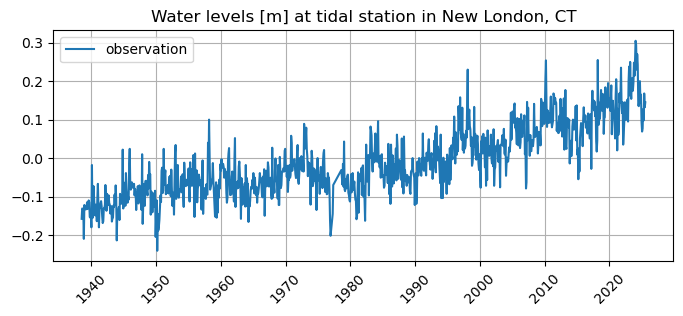

In [11]:
# plot ~90 years of monthly sea level data
# %matplotlib widget 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,3))
ax.plot(time_long.values, sea_level_long.values, label="observation")
plt.xticks(rotation=45) # Rotates X-axis ticks by 45 degrees
plt.title("Water levels [m] at tidal station in New London, CT")
ax.grid(True) # add grids
ax.legend() # add legends

R-squared: 0.664461
sea level trend: 0.0293 m/decade


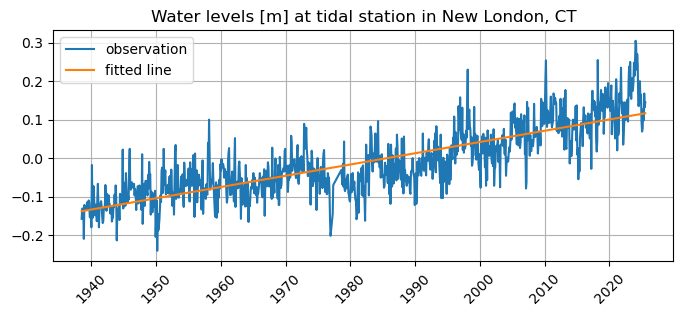

In [12]:
# compute the linear trend of sea level and the R-squared value
# (A higher R-squared means the model explains more of the variability in the data, 
# with a value of 1 representing a perfect fit and 0 meaning the model does not explain any of the variance. 
# For example, an R-squared of 0.75 means the model accounts for 75% of the total variation in the dependent variable.)

# Perform the linear regression
res = stats.linregress(time_long.to_julian_date(), sea_level_long.values)
# Coefficient of determination (R-squared)
print(f"R-squared: {res.rvalue**2:.6f}")
# Plot the data along with the fitted line
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,3))
ax.plot(time_long.values, sea_level_long.values, label="observation")
ax.plot(time_long.values, res.intercept + res.slope*time_long.to_julian_date(), label='fitted line')
plt.xticks(rotation=45) # Rotates X-axis ticks by 45 degrees
plt.title("Water levels [m] at tidal station in New London, CT")
ax.grid(True) # add grids
ax.legend() # add legends
# calculated trend per decade (res.slope is trend per day)
print(f"sea level trend: {res.slope*365*10:.4f} m/decade")

In [13]:
time_long[479]

Timestamp('1980-01-15 00:00:00')

<div class="alert alert-block alert-warning">
<b>Exercise 3:</b> The R-squared value (~0.66) from fitting a regression model to New London's monthly sea level data suggests that 66% of the variance is explained by the model. What mechanisms might account for the remaining 34% of unexplained variance, causing the R-squared to deviate from 1? (tip: the data analyzed above is the monthly sea level data) (1 pt) Calculate the sea level trend from the 1980s onward, overlay the fitted line on the original plot, and compare this recent trend to the overall trend in terms of slope and model fit (1 pt). 
</div>

# Your answers to the exercises:
Please complete your exercises below:

## Exercise 1
<div class="alert alert-block alert-warning">
<b>Exercise 1:</b> The figures above show tidal variations in water level at New London, CT. What is the dominant tidal period, and how can you identify it from the plots? Why are the two daily high water levels different (i.e., a higher high water and a lower high water)? (Tip: refer to tidal inequality — NOAA website: https://tidesandcurrents.noaa.gov/restles4.html) Describe the neap and spring tidal cycles visible in the data, and explain how they relate to the phases of the moon (tip: search for the moon cycle in August 2025).  Identify the tidal range during neap and spring tides, respectively. (1 pt) 
</div>

## Exercise 2
<div class="alert alert-block alert-warning">
<b>Exercise 2:</b> Can you create a plot of New London water levels during Hurricane Irene (1 pt) and explain the observed water level rise associated with the storm surge (1 pt)? (tip: read article "Tropical Storm Irene Delivered a Sunday Punch to Connecticut" https://digitalcommons.lib.uconn.edu/wracklines/68/)
</div>

## Exercise 3
<div class="alert alert-block alert-warning">
<b>Exercise 3:</b> The R-squared value (~0.66) from fitting a regression model to New London's monthly sea level data suggests that 66% of the variance is explained by the model. What mechanisms might account for the remaining 34% of unexplained variance, causing the R-squared to deviate from 1? (tip: the data analyzed above is the monthly sea level data) (1 pt) Calculate the sea level trend from the 1980s onward, overlay the fitted line on the original plot, and compare this recent trend to the overall trend in terms of slope and model fit (1 pt). 
</div>

## Additional Exercise
<div class="alert alert-block alert-warning">
<b>Additional Exercise: </b> Can you use the find_peaks function to identify low water levels instead, make a plot that shows the identified low water levels, and calculate the mean low water level? (1 pt)
</div>